# Gaussian Processes!

Warning: I've prioritized making nicer live demos (e.g. by using as little vertical space as possible and putting breaks between code blocks to avoid spoilers) over typical code readability standards.

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
rng = np.random.RandomState()

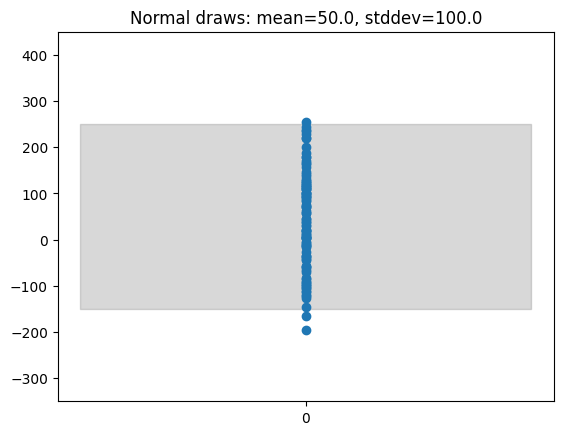

In [5]:
numdraws = 100; mean = 50.0; stddev = 100.0
draws = rng.normal(mean,stddev,numdraws) # draw the random draws
numx=100; x=np.linspace(start=-1,stop=1,num=numx); twosd=2*stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd+mean,-twosd+mean,color="gray",alpha=0.3) # coloring 2 std dev range
plt.scatter(np.zeros(numdraws),draws) # plotting the draw(s)
plt.ylim((-4*stddev+mean,4*stddev+mean)); pltaxes = plt.gca(); pltaxes.axes.get_xaxis().set_ticks([0]) # make the plot
output = plt.title("Normal draws: mean=" + str(mean) + ", stddev=" + str(stddev)) # make the plot

In [6]:
bnd = 4.0
p_1_in = sp.stats.norm.cdf(bnd,0,1)-sp.stats.norm.cdf(-bnd,0,1)
p_100_in = np.exp(100*np.log(p_1_in))
text = "The probability of one data point outside " + str(bnd)
text = text + " standard deviations is " + str(1-p_1_in) 
text = text + ". The probability of any in 100 points outside that range is " + str(1-p_100_in)
print(text)

The probability of one data point outside 4.0 standard deviations is 6.334248366623996e-05. The probability of any in 100 points outside that range is 0.00631442866149845


In [7]:
from matplotlib import cm

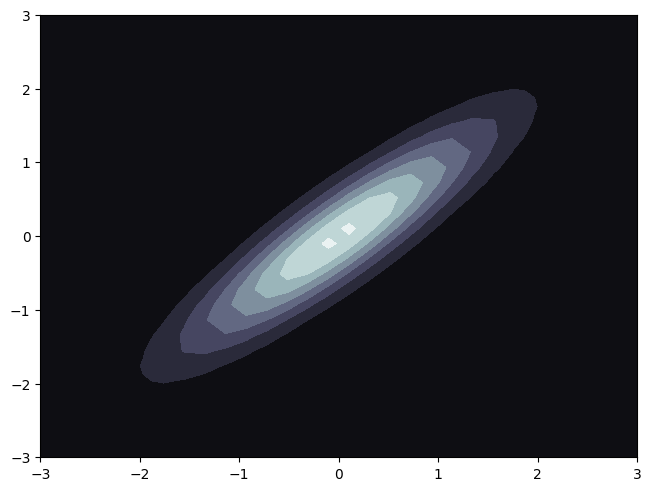

In [8]:
# see also https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/ by christian
# for a fancy combo of both 3d and counter plots
mu = np.zeros(2); corr = 0.9
cov = np.array([[1.0,corr],[corr,1.0]])
numy = 30; y=np.linspace(-3,3,numy); y1,y2 = np.meshgrid(y,y)
pos = np.empty(y1.shape + (2,)); pos[:,:,0] = y1; pos[:,:,1] = y2
distr = sp.stats.multivariate_normal(mu,cov)
dens = distr.pdf(pos)

fig, ax = plt.subplots(layout='constrained')
surf = ax.contourf(y1,y2,dens,cmap=plt.cm.bone)
plt.show()

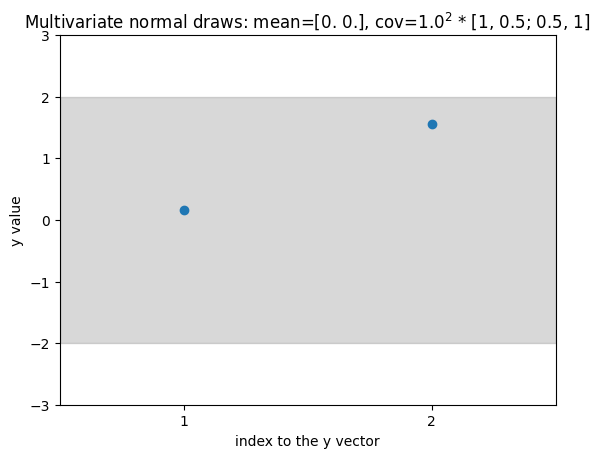

In [9]:
mean = np.zeros(2); signal_stddev = 1.0; corr = 0.5
cov = signal_stddev**2*np.array([[1,corr],[corr,1]]) # covariance matrix
numdraws = 1; draws=rng.multivariate_normal(mean,cov,size=numdraws); # make the draws
numx=100; xstart=0.5; xstop=2.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
marker_collection=["o","^","x"]
for i in np.arange(0,numdraws,1): plt.scatter([1,2],draws[i,:],marker=marker_collection[np.mod(i,3)]); # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca(); pltaxes.axes.get_xaxis().set_ticks([1,2]); plt.xlabel("index to the y vector"); plt.ylabel("y value") # make the plot
output = plt.title("Multivariate normal draws: mean=" + str(mean) + ", cov=" + str(signal_stddev) + "$^2$ * [1, " + str(corr) + "; " + str(corr) + ", 1]") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

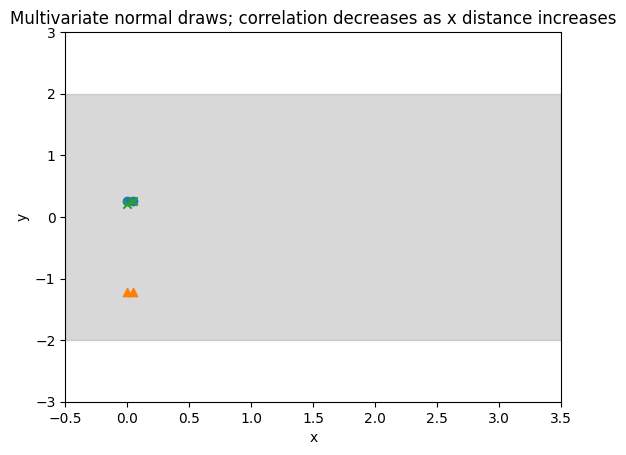

In [11]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
numx=100; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.array([0.0,0.05]).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=3); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,3)]) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca(); plt.xlabel("x"); plt.ylabel("y")  # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

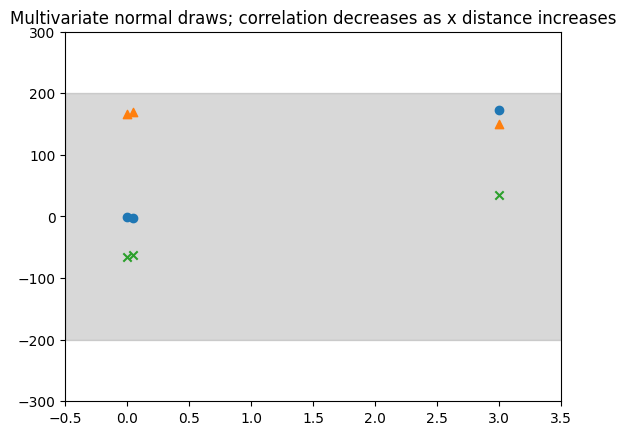

In [12]:
signal_stddev = 100.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
numx=100; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.array([0.0,0.05,3.0]).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=3); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,3)]) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

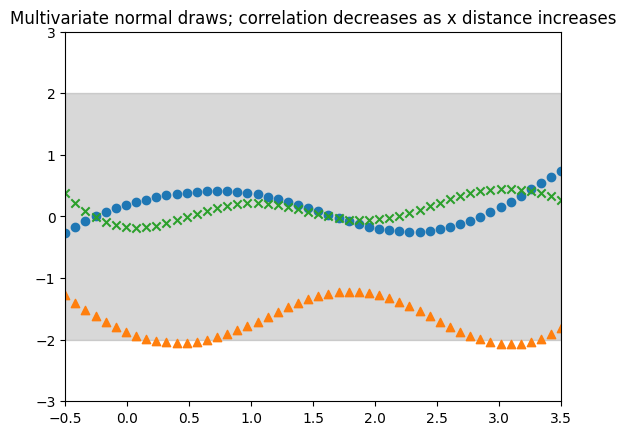

In [13]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
numx=50; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.linspace(start=xstart,stop=xstop,num=numx).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=3); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,3)]) #plt.plot(xdraw,ydraw) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

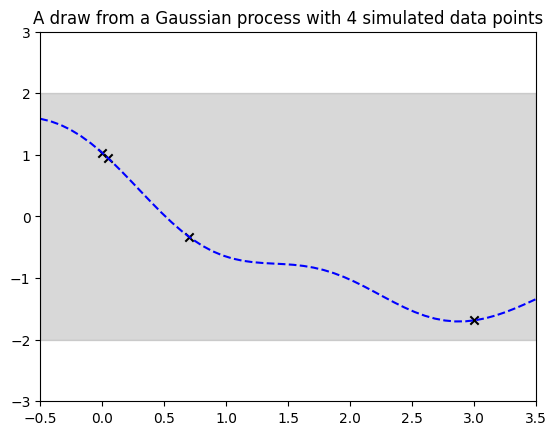

In [14]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
xobs = np.array([0.0,0.05,0.7,3.0]); Nobs = xobs.shape[0]
numx=50; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xcurve=np.linspace(start=xstart,stop=xstop,num=numx); xall = np.concatenate((xcurve,xobs)).reshape(-1,1)
yall = gp.sample_y(xall,random_state=rng,n_samples=1); ycurve=yall[0:numx]; yobs=yall[numx:numx+Nobs]
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue"); plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("A draw from a Gaussian process with " + str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

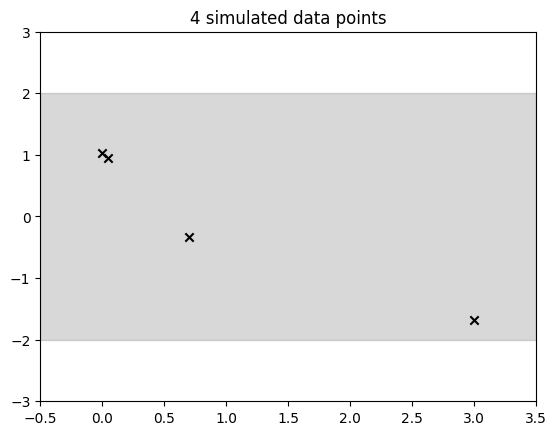

In [15]:
# just the training data
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title(str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

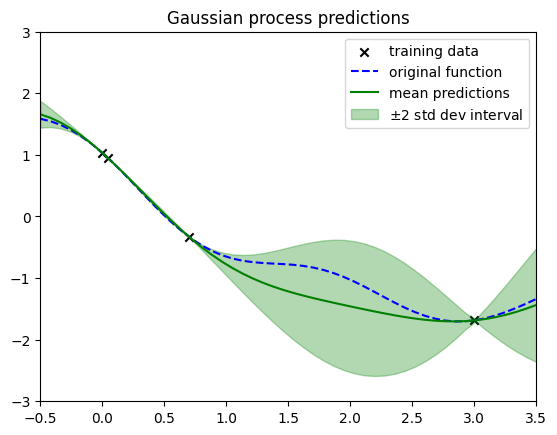

In [16]:
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

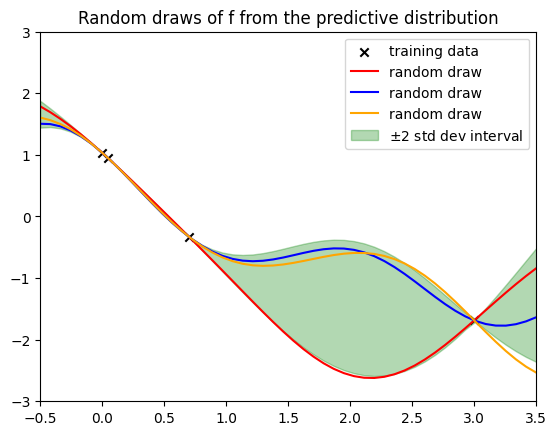

In [17]:
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
y_all_draws=gpfit.sample_y(xcurve.reshape(-1,1),random_state=rng,n_samples=3)
color_options=["red","blue","orange"]
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
for i, ydraw in enumerate(y_all_draws.T): plt.plot(xcurve,ydraw,label="random draw",color=color_options[np.mod(i,3)])
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Random draws of f from the predictive distribution")